In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import datetime
import gc

## Construncting dataset from csv files. 

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/MS_NEU/7100_TimeSeries/Project/train.csv")
building_df = pd.read_csv('/content/drive/MyDrive/MS_NEU/7100_TimeSeries/Project/building_metadata.csv')
weather_df = pd.read_csv('/content/drive/MyDrive/MS_NEU/7100_TimeSeries/Project/weather_train.csv')

In [ ]:
# visualizing train_df
print(train_df.head(5))
print(train_df.info())

   building_id  meter            timestamp  meter_reading
0            0      0  2016-01-01 00:00:00            0.0
1            1      0  2016-01-01 00:00:00            0.0
2            2      0  2016-01-01 00:00:00            0.0
3            3      0  2016-01-01 00:00:00            0.0
4            4      0  2016-01-01 00:00:00            0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB
None


In [ ]:
# visualizing building_df
print(building_df.head(5))
print(building_df.info())
print(building_df.building_id.unique())


   site_id  building_id primary_use  square_feet  year_built  floor_count
0        0            0   Education         7432      2008.0          NaN
1        0            1   Education         2720      2004.0          NaN
2        0            2   Education         5376      1991.0          NaN
3        0            3   Education        23685      2002.0          NaN
4        0            4   Education       116607      1975.0          NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB
None
[   0    1    2 ... 1446 1447 1448]


In [ ]:
# visualizing weather_df
print(weather_df.head(5))
print(weather_df.info())

   site_id            timestamp  air_temperature  cloud_coverage  \
0        0  2016-01-01 00:00:00             25.0             6.0   
1        0  2016-01-01 01:00:00             24.4             NaN   
2        0  2016-01-01 02:00:00             22.8             2.0   
3        0  2016-01-01 03:00:00             21.1             2.0   
4        0  2016-01-01 04:00:00             20.0             2.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_direction  \
0             20.0                NaN              1019.7             0.0   
1             21.1               -1.0              1020.2            70.0   
2             21.1                0.0              1020.2             0.0   
3             20.6                0.0              1020.1             0.0   
4             20.0               -1.0              1020.0           250.0   

   wind_speed  
0         0.0  
1         1.5  
2         0.0  
3         0.0  
4         2.6  
<class 'pandas.core.frame.DataFr

## **Exploratory Data Analysis**

In [ ]:
# creating copy of tran_df (just to avoid overwriting)
train_df_copy = train_df

In [ ]:
train_df_merged = train_df_copy.merge(building_df, left_on='building_id',right_on='building_id',how='left')
train_df_merged = train_df_merged.merge(weather_df,how='left',left_on=['site_id','timestamp'],right_on=['site_id','timestamp'])
del weather_df
gc.collect()

183

In [ ]:
train_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20216100 entries, 0 to 20216099
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   building_id         int64  
 1   meter               int64  
 2   timestamp           object 
 3   meter_reading       float64
 4   site_id             int64  
 5   primary_use         object 
 6   square_feet         int64  
 7   year_built          float64
 8   floor_count         float64
 9   air_temperature     float64
 10  cloud_coverage      float64
 11  dew_temperature     float64
 12  precip_depth_1_hr   float64
 13  sea_level_pressure  float64
 14  wind_direction      float64
 15  wind_speed          float64
dtypes: float64(10), int64(4), object(2)
memory usage: 2.6+ GB


In [ ]:
#Reduced dataset with 3 sites, i.w, 291 buildings
train_df_merged = train_df_merged[train_df.building_id < 291]

In [ ]:
train_df_merged.reset_index(drop=True)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0000,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0000,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0000,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0000,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0000,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4160326,287,3,2016-12-31 23:00:00,0.0000,2,Office,33713,1956.0,NaN,16.7,NaN,10.0,0.0,1011.0,250.0,2.6
4160327,288,0,2016-12-31 23:00:00,5.6200,2,Entertainment/public assembly,10733,2005.0,NaN,16.7,NaN,10.0,0.0,1011.0,250.0,2.6
4160328,289,0,2016-12-31 23:00:00,11.8600,2,Entertainment/public assembly,9666,2005.0,NaN,16.7,NaN,10.0,0.0,1011.0,250.0,2.6
4160329,290,0,2016-12-31 23:00:00,22.2000,2,Office,51732,1966.0,NaN,16.7,NaN,10.0,0.0,1011.0,250.0,2.6


## Visualization##

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


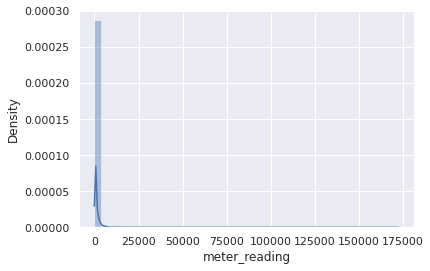

In [ ]:
import seaborn as sns
sns.set_theme()

#before tranformation
x = sns.distplot(train_df_merged["meter_reading"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


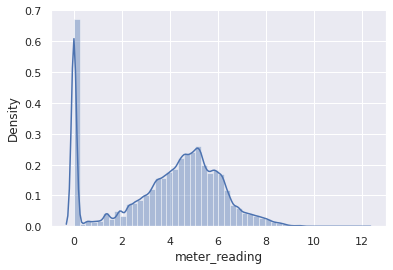

In [ ]:
#after tranformation
x = np.log1p(train_df_merged["meter_reading"])
x = sns.distplot(x)

##ADF test to check stationarity

In [ ]:
train = train_df_merged.copy()
train.timestamp = pd.to_datetime(train.timestamp)
train[['timestamp', 'meter_reading']].set_index('timestamp').mean()['meter_reading']

273.9684189757881

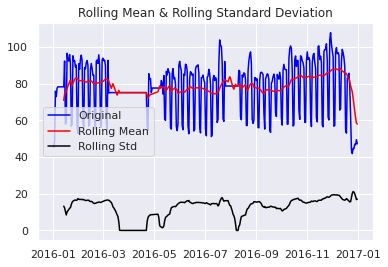

In [ ]:
# Check stationarity of building ID = 105
df = train[ (train['meter'] == 0) & (train['building_id'].isin( [105] )) ]
df = df.set_index('timestamp').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
df = df['meter_reading']
rolling_mean = df.rolling(window = 14).mean()
rolling_std = df.rolling(window = 14).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df)
print('p-value: {}'.format(result[1]))

p-value: 0.5381926771274052


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


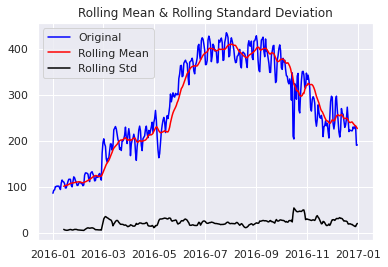

In [ ]:
# Check stationarity of all buildings
df = train
df = df.set_index('timestamp').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
df = df['meter_reading']
rolling_mean = df.rolling(window = 14).mean()
rolling_std = df.rolling(window = 14).std()
plt.plot(df, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df)
print('p-value: {}'.format(result[1]))

p-value: 0.48655913951734575


##Mean meter reading for each site_id (# 0, 1 2)

Site ID 0
Site ID 1
Site ID 2


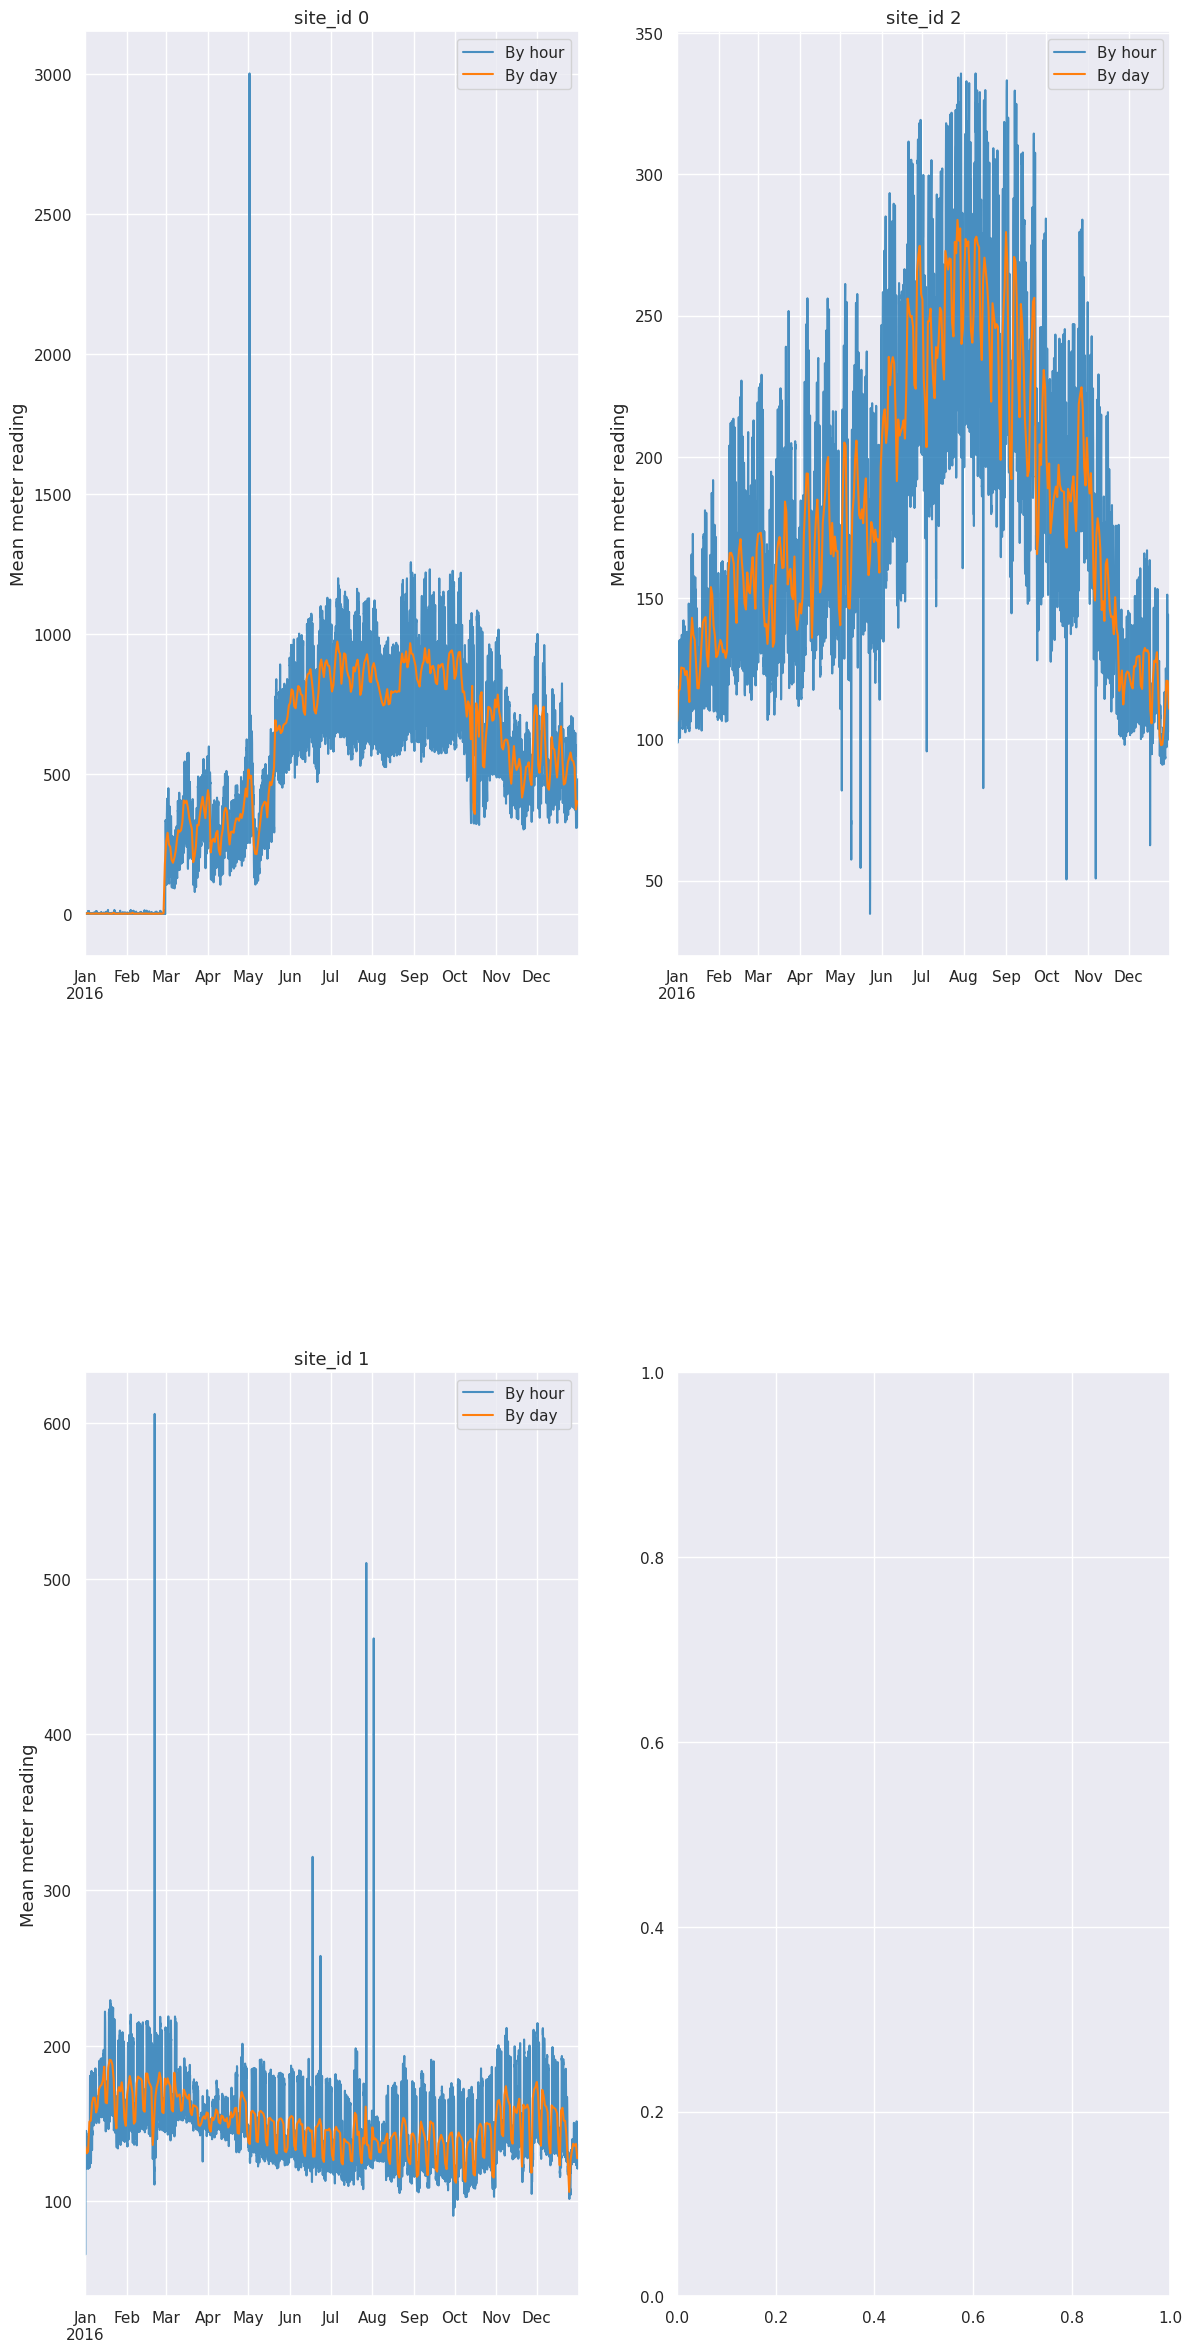

In [ ]:
num_plots = 2
fig, axes = plt.subplots(num_plots,2,figsize=(14, 30), dpi=100)
site_id_lists = [0, 1, 2]
for i in range(len(site_id_lists)):
    print("Site ID", i)
    train[train['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%num_plots][i//num_plots], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
    train[train['site_id'] == i][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%num_plots][i//num_plots], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i%num_plots][i//num_plots].legend();
    axes[i%num_plots][i//num_plots].set_title('site_id {}'.format(i), fontsize=13);
    plt.subplots_adjust(hspace=0.45)

##Mean meter reading for each primary use for site_id=2

IndexError: ignored

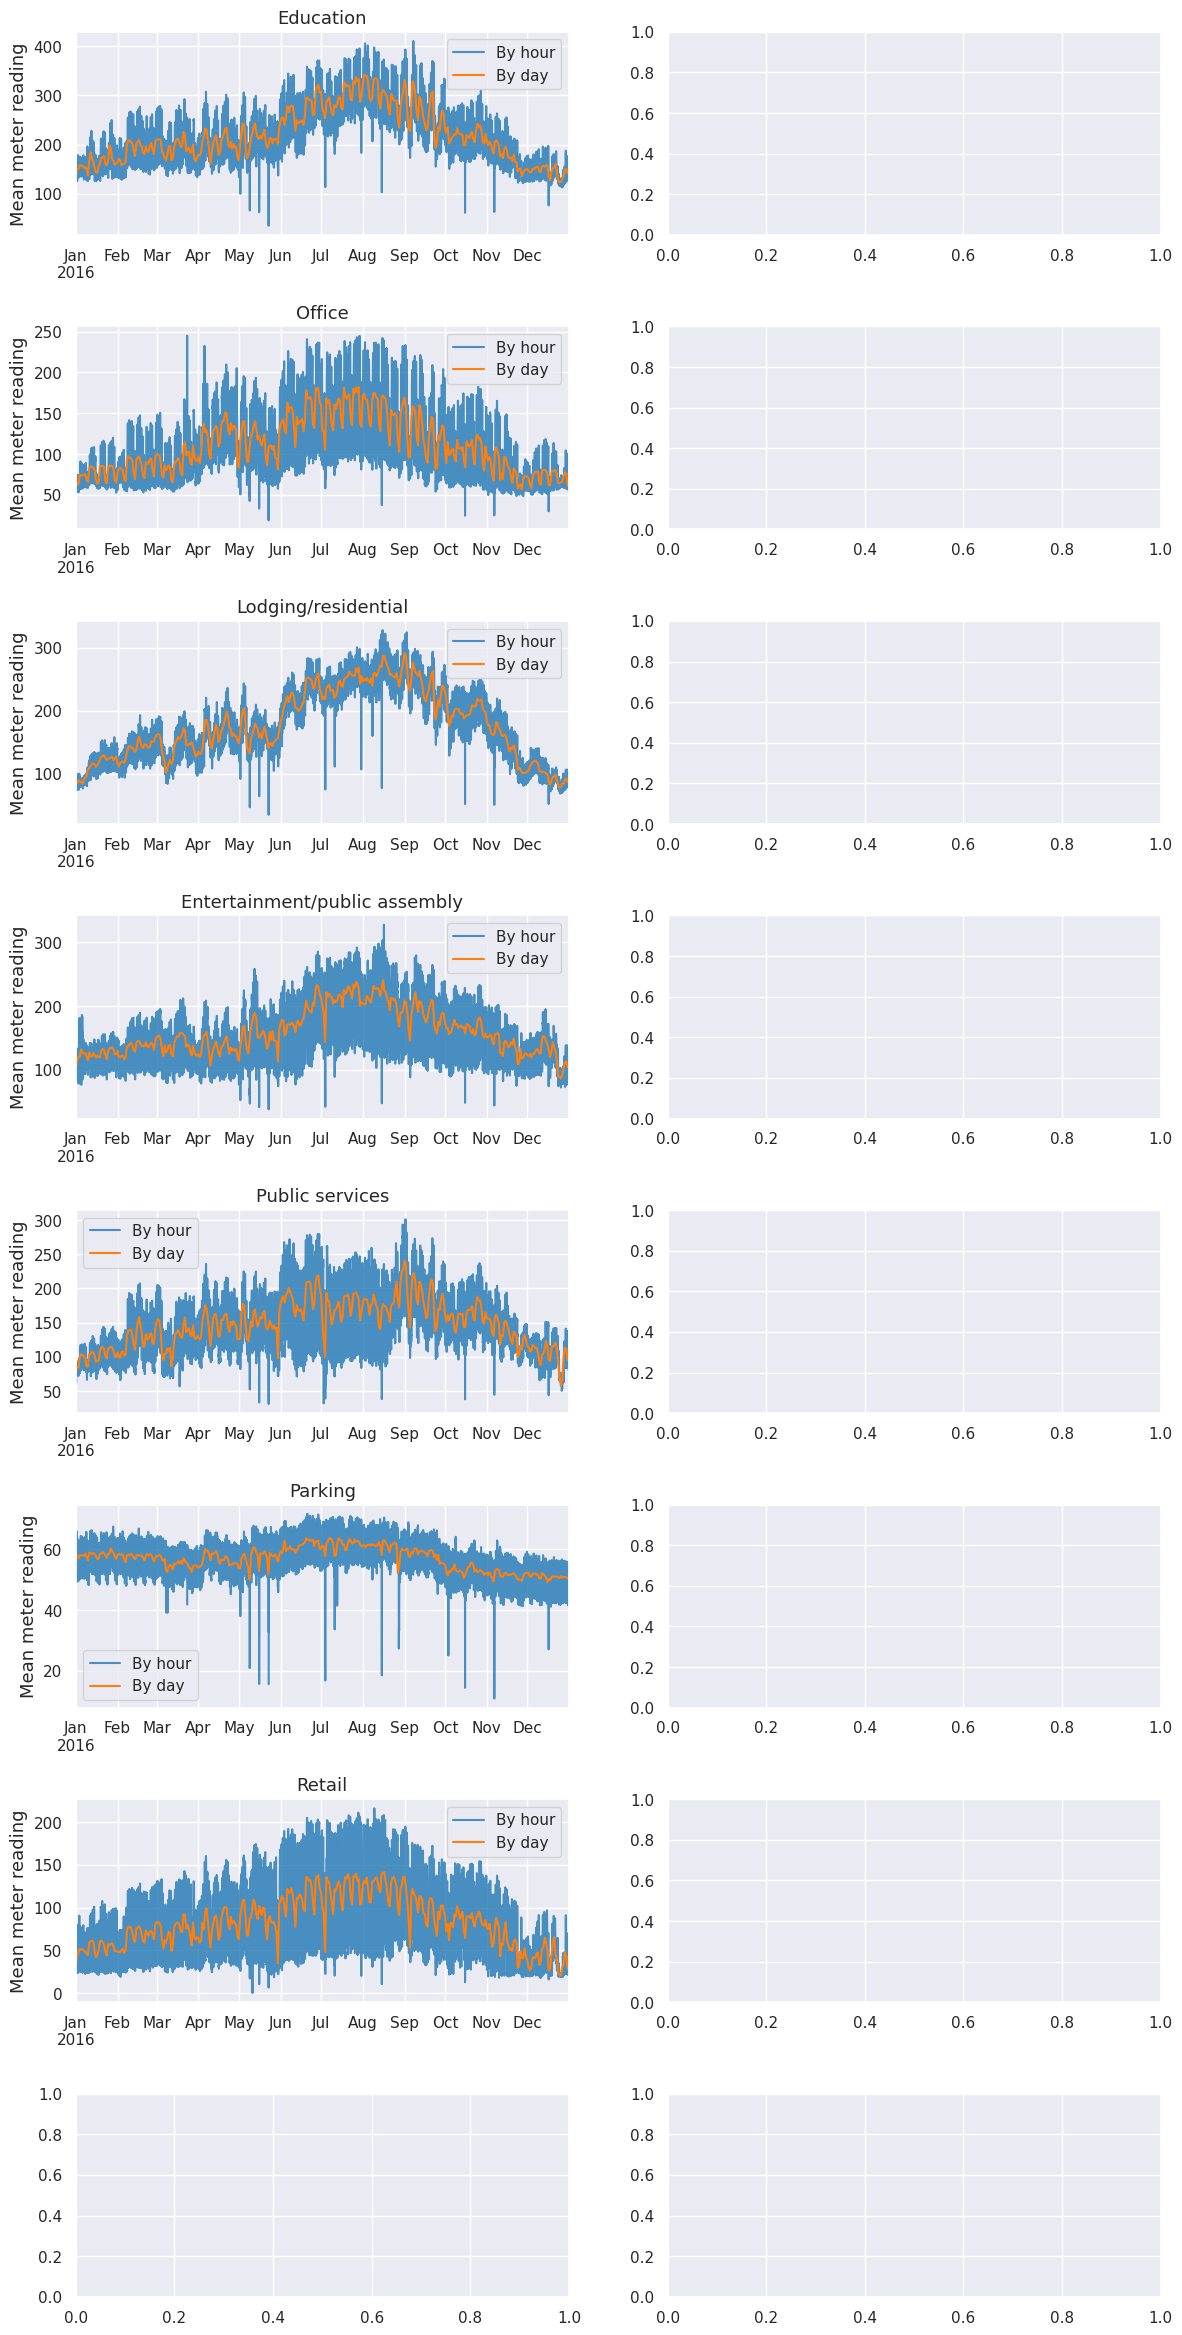

In [ ]:
specific_site_id = 2
fig, axes = plt.subplots(8,2,figsize=(14, 30), dpi=100)
for i, use in enumerate(train['primary_use'].value_counts().index.to_list()):
    try:
        train[(train['site_id'] == specific_site_id) & (train['primary_use'] == use)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
        train[(train['site_id'] == specific_site_id) & (train['primary_use'] == use)][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%8][i//8], alpha=1, label='By day', color='tab:orange').set_xlabel('');
        axes[i%8][i//8].legend();
    except TypeError:
        pass
    axes[i%8][i//8].set_title(use, fontsize=13);
    plt.subplots_adjust(hspace=0.45)

##Meter reading for site_id - 2, primary use - Education, and meter id - Electricity (2)

IndexError: ignored

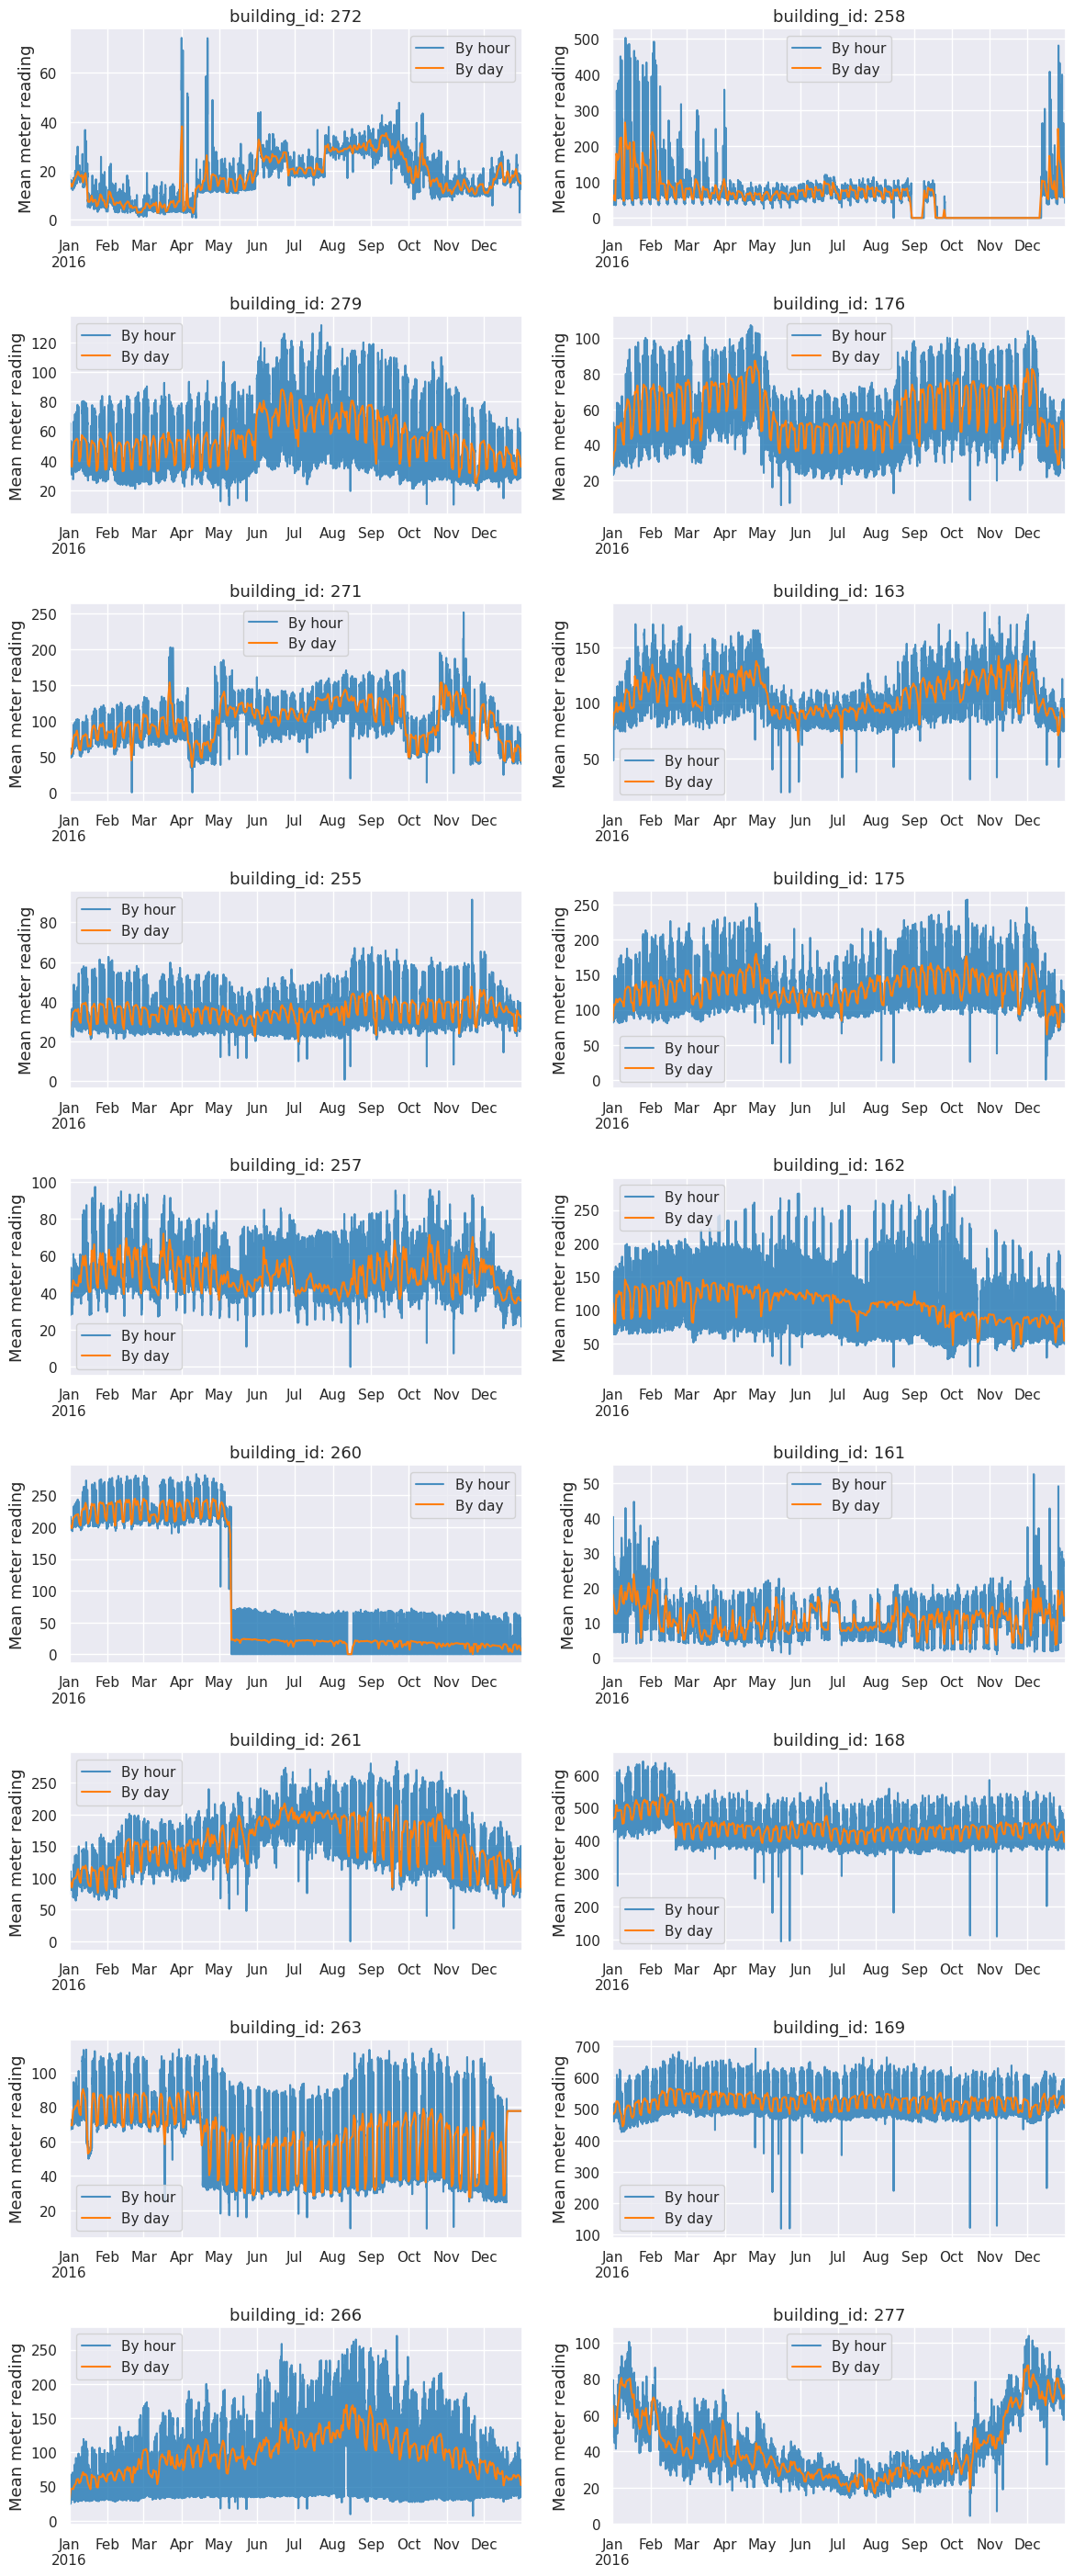

In [ ]:
fig, axes = plt.subplots(9,2,figsize=(14, 36), dpi=100)

site_id = 2
use = 'Education'
meter_id = 0


for i, building in enumerate(train[(train['site_id'] == site_id) & (train['primary_use'] == 'Education') & (train['meter'] == meter_id)]['building_id'].value_counts(dropna=False).index.to_list()):
    train[(train['site_id'] == site_id) & (train['primary_use'] == 'Education') & (train['meter'] == meter_id) & (train['building_id'] == building)][['timestamp', 'meter_reading']].set_index('timestamp').resample('H').mean()['meter_reading'].plot(ax=axes[i%9][i//9], alpha=0.8, label='By hour', color='tab:blue').set_ylabel('Mean meter reading', fontsize=13);
    train[(train['site_id'] == site_id) & (train['primary_use'] == 'Education') & (train['meter'] == meter_id) & (train['building_id'] == building)][['timestamp', 'meter_reading']].set_index('timestamp').resample('D').mean()['meter_reading'].plot(ax=axes[i%9][i//9], alpha=1, label='By day', color='tab:orange').set_xlabel('');
    axes[i%9][i//9].legend();
    axes[i%9][i//9].set_title('building_id: ' + str(building), fontsize=13);
    plt.subplots_adjust(hspace=0.45)

##Checking missing values

In [ ]:
total = train.isnull().sum().sort_values(ascending = False)
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False)
missing_weather_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_weather_data.head(9)

,Total,Percent
floor_count,3606974,86.699207
cloud_coverage,1592170,38.270272
year_built,722462,17.365493
precip_depth_1_hr,572730,13.766453
wind_direction,203250,4.885429
sea_level_pressure,27849,0.669394
wind_speed,3049,0.073287
air_temperature,2270,0.054563
dew_temperature,2270,0.054563


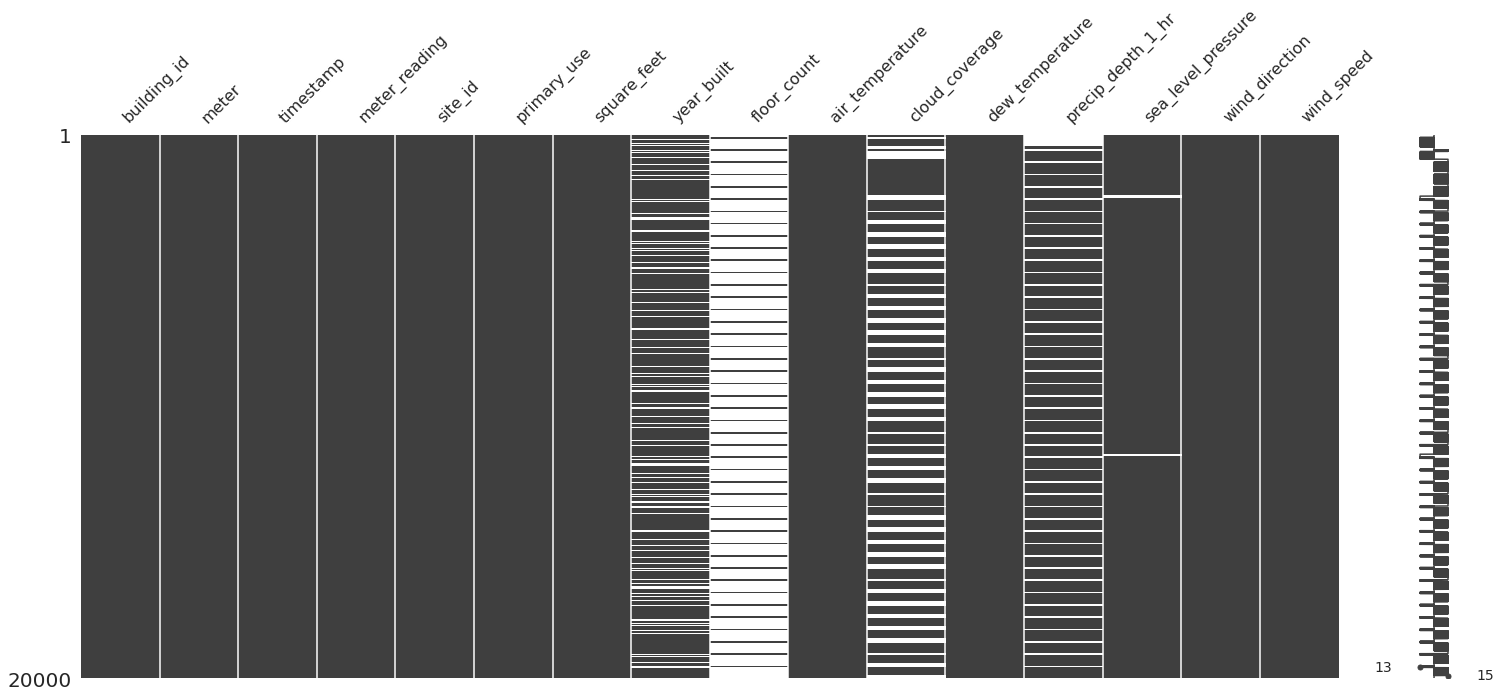

In [ ]:
import missingno as msno
msno.matrix(train.head(20000))